<a href="https://colab.research.google.com/github/budsayamasNithi/AI/blob/main/Copy_of_Copy_of_movie_review_sentiment_analysis_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# Sentiment Analysis
We will use NLTK and Spacy library to cover our case study.

more datasets https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import spacy # another function for NLP
import nltk
import en_core_web_sm

# โหลดโมเดล NLP สำหรับภาษาอังกฤษ (English) ของ library spacy
nlp = en_core_web_sm.load()  # Loading english large corpus


In [2]:
from google.colab import drive
drive.mount('/content/drive') #ระวังเครื่องหมาย ‘ กับ ' ต่างกันนะคะ

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset/IMDB_Dataset_1000.csv'
df_raw = pd.read_csv(path) ## Dataset is now stored in a Pandas Dataframe
df_raw

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
994,"On watching this film, I was amazed at how med...",positive
995,Nothing is sacred. Just ask Ernie Fosselius. T...,positive
996,I hated it. I hate self-aware pretentious inan...,negative
997,I usually try to be professional and construct...,negative


So we can see we have two columns review and sentiment. Sentiment column tells the sentiment of the text, which mean whether your text is positive or negative.
e.g;
* He is a very good boy - This text has a positive sentiment.
* He is a very bad boy - It has negative sentiment.
* We will talk about sentiment later in detail. For now lets focus on EDA process.

In [7]:
df_raw.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     999 non-null    object
 1   sentiment  999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [6]:
df_raw.isnull().sum() # We do not have null values

review       0
sentiment    0
dtype: int64

Before any analysis, we should have question to ourself. It means what you are going to find in the given data?
Everyone has different questions. So there is not right way of analysis. What matters is your final output should be correct. There is not a single way to conclude one thing. So before start lets ask some question which we will solve in this analysis.
* How many positive and negative reviews are there?
* What are the most common words in positive and negative reviews?
* Find the sentiment of each review and compare it with existing sentiment value.

As there are only two columns, So there is no more things to analyse. If you have anything else in your mind which you want or can analyse, comment it below.

# EDA Exploratory Data Analysis

In [8]:
df_counts = df_raw["sentiment"].value_counts().reset_index()
df_counts.head()


,index,sentiment
0,positive,501
1,negative,498


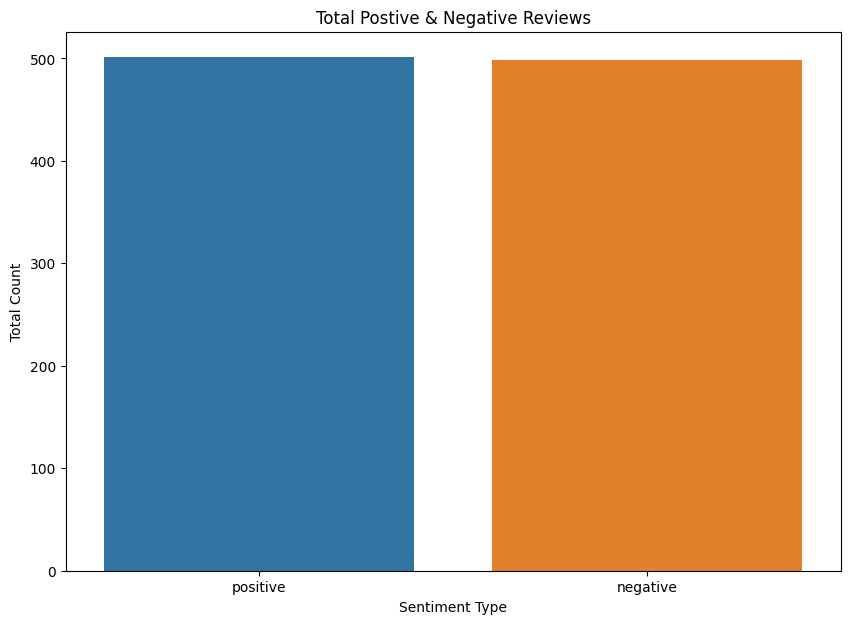

In [9]:
# So we can say that we almost have same number of reviews. That mean we have very good data.
plt.figure(figsize=(10, 7))
sns.barplot(data=df_counts, x='index', y='sentiment')
plt.xlabel("Sentiment Type");
plt.ylabel("Total Count");
plt.title("Total Postive & Negative Reviews");

In [10]:
#The itertuples() function is used to iterate over DataFrame rows as namedtuples. If True, return the index as the first element of the tuple. The name of the returned namedtuples or None to return regular tuples.
empty_review_index = []
for i, review, sentiment in df_raw.itertuples():
    # if review type is string
    if type(review) == str:
        #if review is empty space
        if review.isspace():
            # Appent its index to the list
            empty_review_index.append(i)

In [11]:
empty_review_index # So we do not have any empty review

[]

## Positive & Negative Token Count & Frequency Distribution

We will create a function which applies following action on reviews:
* Remove special characters
* Remove stop words
* Tokenization
* Apply lemmatization

In [12]:
import re # for regular expression

In [13]:
pos_token = [] # to save positive tokens
neg_token = [] # to save negative tokens
corpus=[]
noun = []
def process_reviews(df):
    for index, reviews, sentiment in df.itertuples():
        if type(reviews) == str:
            reviews = re.sub('[^a-zA-Z]', ' ', reviews)
            reviews = reviews.lower()
            doc = nlp(reviews) #nlp("...") ถูกใช้เพื่อประมวลผลข้อความและสร้าง doc ที่เก็บข้อมูลเกี่ยวกับข้อความที่ถูกประมวลผลและสามารถใช้ในการวิเคราะห์ข้อความต่อไปได้.
            temp = []
            for token in doc:
                if not token.text.isspace():
                    if not token.is_stop and len(token.text) > 2:
                        if token.pos_ == 'NOUN':
                            noun.append(token.text)
                        if sentiment == "positive":
                            pos_token.append(token.text)
                        else:

                            neg_token.append(token.text)
                        temp.append(token.lemma_)
                        corpus.append(' '.join(temp))


In [14]:
process_reviews(df_raw)

In [15]:
# all the positive token list
pos_token[0:10]

['reviewers',
 'mentioned',
 'watching',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'thing',
 'struck']

In [16]:
# all the negative token list
neg_token[0:10]

['basically',
 'family',
 'little',
 'boy',
 'jake',
 'thinks',
 'zombie',
 'closet',
 'parents',
 'fighting']

In [17]:
from nltk import FreqDist

In [18]:
# preparing frequency distribution variables
freq_pos = FreqDist(pos_token)
freq_neg = FreqDist(neg_token)

In [19]:
freq_pos

FreqDist({'film': 809, 'movie': 767, 'like': 363, 'good': 286, 'story': 257, 'great': 246, 'time': 242, 'life': 183, 'best': 183, 'people': 180, ...})

In [20]:
freq_neg

FreqDist({'movie': 1021, 'film': 749, 'like': 439, 'bad': 280, 'good': 254, 'time': 213, 'story': 204, 'don': 200, 'people': 183, 'plot': 173, ...})

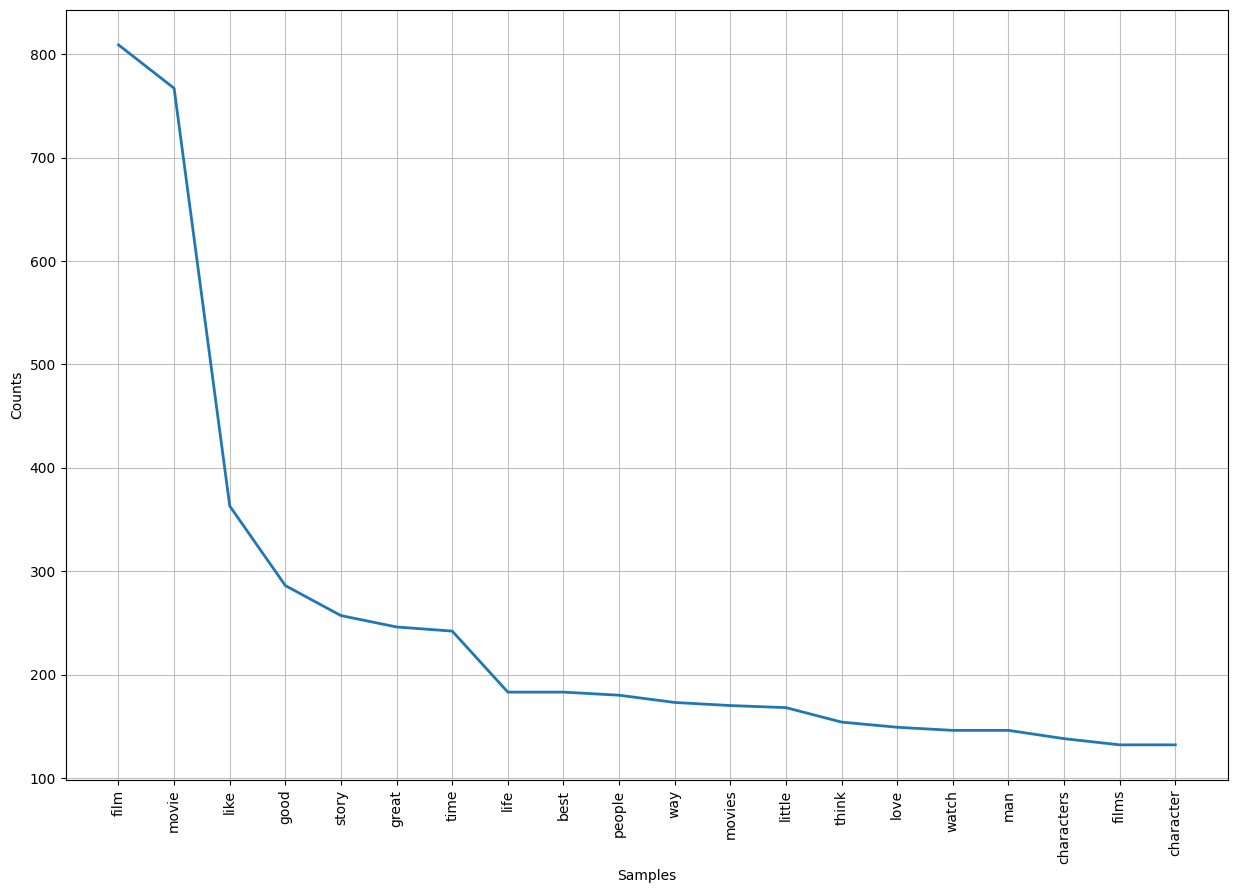

<Axes: xlabel='Samples', ylabel='Counts'>

In [21]:
# Top 20 most repeated words in positive comments
plt.figure(figsize=(15, 10))
freq_pos.plot(20)

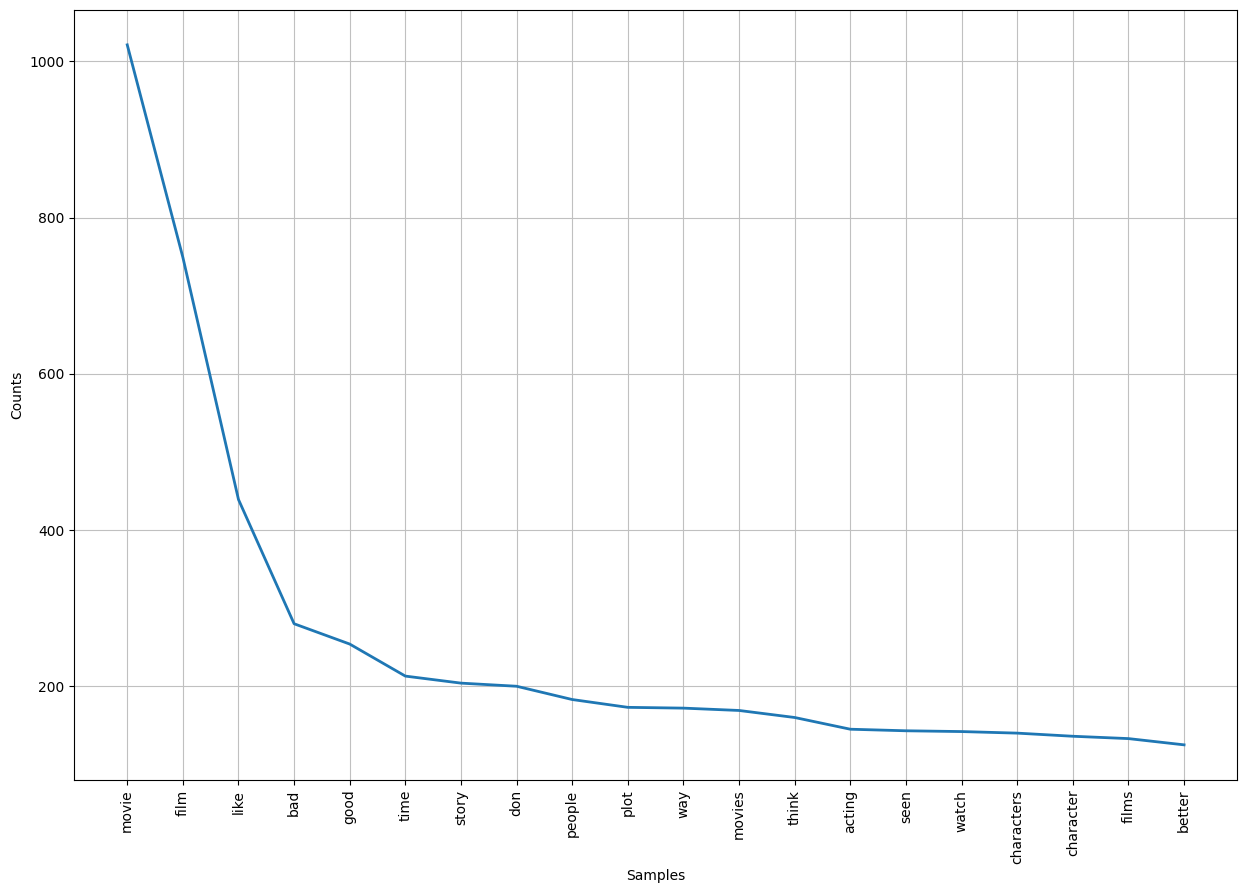

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# top 20 most repeated words in negative comments
plt.figure(figsize=(15, 10))
freq_neg.plot(20)

In [22]:
# All the nouns used in our reviews. It will give you an idea like what are the famous keywords?
noun[0:10]

['reviewers',
 'episode',
 'thing',
 'brutality',
 'scenes',
 'violence',
 'right',
 'word',
 'punches',
 'regards']

## Word Cloud

In [23]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

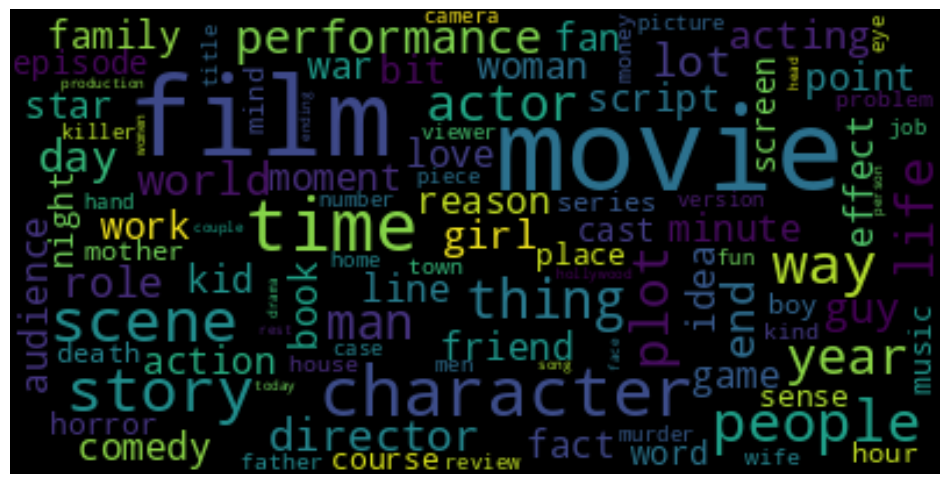

In [24]:
# Most famous nouns used in movie reviews

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(' '.join(noun))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear") # การแก้ไขรูปภาพจะเป็นวิธี bilinear
plt.axis("off")
plt.show()


# Sentiment Analysis

In [25]:
df_raw

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
994,"On watching this film, I was amazed at how med...",positive
995,Nothing is sacred. Just ask Ernie Fosselius. T...,positive
996,I hated it. I hate self-aware pretentious inan...,negative
997,I usually try to be professional and construct...,negative


In [26]:
#sentiment analysis with TextBlob
from textblob import TextBlob
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df_raw['Subjectivity'] = df_raw["review"].apply(getSubjectivity)
df_raw['Polarity'] = df_raw["review"].apply(getPolarity)

df_raw

,review,sentiment,Subjectivity,Polarity
0,One of the other reviewers has mentioned that ...,positive,0.490369,0.023433
1,A wonderful little production. <br /><br />The...,positive,0.559343,0.109722
2,I thought this was a wonderful way to spend ti...,positive,0.658730,0.354008
3,Basically there's a family where a little boy ...,negative,0.454167,-0.057813
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.452916,0.217952
...,...,...,...,...
994,"On watching this film, I was amazed at how med...",positive,0.493452,0.307143
995,Nothing is sacred. Just ask Ernie Fosselius. T...,positive,0.553143,0.158892
996,I hated it. I hate self-aware pretentious inan...,negative,0.509615,-0.370513
997,I usually try to be professional and construct...,negative,0.533213,-0.161574


In [27]:
df_raw["sentiment_TextBlob_score"] = df_raw["Polarity"].apply(lambda x: 'positive' if x >= 0 else 'negative')

In [28]:
df_raw

,review,sentiment,Subjectivity,Polarity,sentiment_TextBlob_score
0,One of the other reviewers has mentioned that ...,positive,0.490369,0.023433,positive
1,A wonderful little production. <br /><br />The...,positive,0.559343,0.109722,positive
2,I thought this was a wonderful way to spend ti...,positive,0.658730,0.354008,positive
3,Basically there's a family where a little boy ...,negative,0.454167,-0.057813,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.452916,0.217952,positive
...,...,...,...,...,...
994,"On watching this film, I was amazed at how med...",positive,0.493452,0.307143,positive
995,Nothing is sacred. Just ask Ernie Fosselius. T...,positive,0.553143,0.158892,positive
996,I hated it. I hate self-aware pretentious inan...,negative,0.509615,-0.370513,negative
997,I usually try to be professional and construct...,negative,0.533213,-0.161574,negative


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
accuracy_score(df_raw["sentiment"], df_raw["sentiment_TextBlob_score"])

0.6996996996996997

# Sentiment Analysis with SentimentIntensity Analyzer

In [31]:
# import library for sntiment analysis.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon') #download dictionary for english sentiment

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [32]:

sm = SentimentIntensityAnalyzer()

In [35]:
# polarit_Scores acuallly gives one dictionary containing 4 valus. negative, positive, neutral and overall value
# compound. So you can see that below sentence has 0.4 neutral and 0.6 negative and overall -0.6696.
# - sign shows it is a negatvie sentence.
sm.polarity_scores("you are so Cool")

{'neg': 0.0, 'neu': 0.501, 'pos': 0.499, 'compound': 0.4572}

In [36]:
# Lets try some more sentences. SO below you can see it contains both negative and positive feedback.
# so nltk is smart enough to undertand it. It actually calculate the score of each word and finally calulates
print(sm.polarity_scores("Star wars is amazing. But the the picturization is not good."))

{'neg': 0.342, 'neu': 0.506, 'pos': 0.152, 'compound': -0.4605}


In [37]:
# Now lets see a wierd thing here. I wrote the same sentense as above but score is different. can you say why?
# Actually if you observer i have capitalize the word AMAZING. So here nltk understands the we want to focus
# on word amazing. That is why below sentence is more positive than the above one. Lets try to capitalize
# more words.
print(sm.polarity_scores("Star wars is AMAZING. But the the picturization is not good."))

{'neg': 0.334, 'neu': 0.495, 'pos': 0.171, 'compound': -0.3904}


Few basic rcommendation
* Do not remove stop words form your sentence if you want to perform sentiment analysis. it will change the sentiment of the sentence. e.g.
I do not love you ----remove stop words -----> i love you ( So here we can see a complete different sentiment.
* Do not change the case of text before performing sentiment analysis as your know I LOVE YOU has more weightage than i love you.
* Do not remove special character like !!. I HATE YOU !!! has stronger sentiment than i hate you.

I think we understand here how nltk understand the sentiment of words.


In [38]:
# Lets apply sentiment analysis on our reviews.

In [39]:
df_raw.head()

,review,sentiment,Subjectivity,Polarity,sentiment_TextBlob_score
0,One of the other reviewers has mentioned that ...,positive,0.490369,0.023433,positive
1,A wonderful little production. <br /><br />The...,positive,0.559343,0.109722,positive
2,I thought this was a wonderful way to spend ti...,positive,0.658730,0.354008,positive
3,Basically there's a family where a little boy ...,negative,0.454167,-0.057813,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.452916,0.217952,positive


In [40]:
df_raw["score"] = df_raw["review"].apply(lambda review : sm.polarity_scores(review))

In [41]:
# extract only compound score
df_raw["sentiment_score"] = df_raw["score"].apply(lambda x: x["compound"])

In [42]:
df_raw.head()

,review,sentiment,Subjectivity,Polarity,sentiment_TextBlob_score,score,sentiment_score
0,One of the other reviewers has mentioned that ...,positive,0.490369,0.023433,positive,"{'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'co...",-0.9951
1,A wonderful little production. <br /><br />The...,positive,0.559343,0.109722,positive,"{'neg': 0.053, 'neu': 0.776, 'pos': 0.172, 'co...",0.9641
2,I thought this was a wonderful way to spend ti...,positive,0.658730,0.354008,positive,"{'neg': 0.094, 'neu': 0.714, 'pos': 0.192, 'co...",0.9605
3,Basically there's a family where a little boy ...,negative,0.454167,-0.057813,negative,"{'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'co...",-0.9213
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.452916,0.217952,positive,"{'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'co...",0.9744


In [43]:
# now lets change our sentiment_score column to binary value 0 or 1.
df_raw["sentiment_score"] = df_raw["sentiment_score"].apply(lambda x: 'pos' if x >= 0 else 'neg')

In [44]:
# now lets change our sentiment_score column to binary value 0 or 1.
df_raw["sentiment"] = df_raw["sentiment"].apply(lambda x: 'pos' if x == "positive" else 'neg')

In [45]:
df_raw.head()

,review,sentiment,Subjectivity,Polarity,sentiment_TextBlob_score,score,sentiment_score
0,One of the other reviewers has mentioned that ...,pos,0.490369,0.023433,positive,"{'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'co...",neg
1,A wonderful little production. <br /><br />The...,pos,0.559343,0.109722,positive,"{'neg': 0.053, 'neu': 0.776, 'pos': 0.172, 'co...",pos
2,I thought this was a wonderful way to spend ti...,pos,0.658730,0.354008,positive,"{'neg': 0.094, 'neu': 0.714, 'pos': 0.192, 'co...",pos
3,Basically there's a family where a little boy ...,neg,0.454167,-0.057813,negative,"{'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'co...",neg
4,"Petter Mattei's ""Love in the Time of Money"" is...",pos,0.452916,0.217952,positive,"{'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'co...",pos


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [47]:
accuracy_score(df_raw["sentiment"], df_raw["sentiment_score"])

0.7227227227227228

In [48]:
# so we can see we have an accuracy score of 69% which is good in sentiment analysis. Sentiment analysis is not
# very easy for most of the models as you can not predict srcasm in text. Many people write review as sarcasm,
# which is very difficult or impossible to predict. example:

sm.polarity_scores('Yaaa.. You said it was a good movie... :/')

{'neg': 0.212, 'neu': 0.531, 'pos': 0.257, 'compound': 0.128}

In [ ]:
# In above example i wrote a sarcasm followed by a crap face text smiley but for computer program its just a
# special characted. So here it doesnt understand the sarcasm. That is why because of these kind of exceptions
# 69% accuracy will be considered as fine number.

Thank you so much.. Upvote if it helps you.